In [14]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns

In [15]:
#LOADING DATASET

df= pd.read_csv("BUILD_WEEK.csv")

print(df.columns)

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'family_support', 'alcohol_consumption'],
      dtype='object')


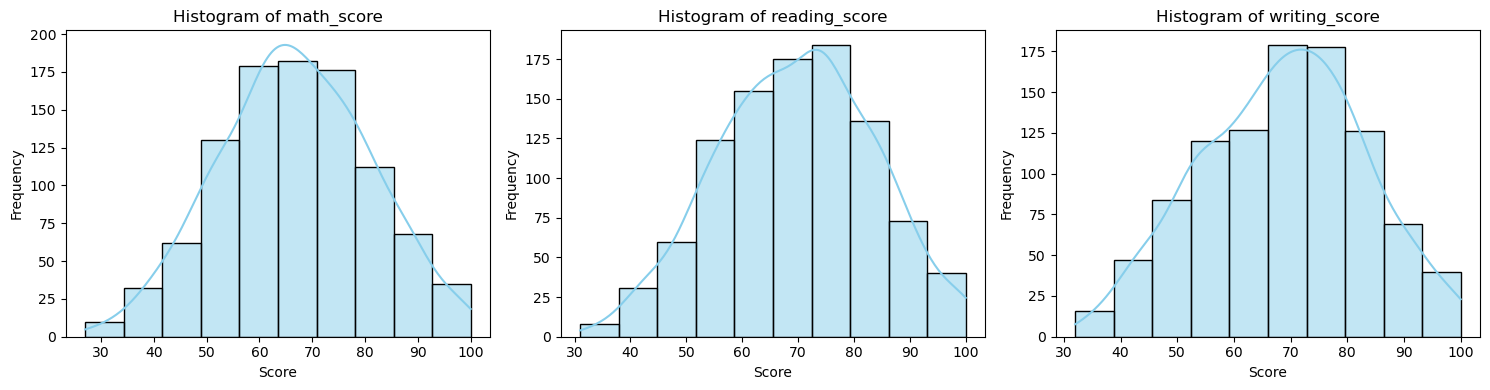

In [9]:
#Data Visualisation

# Plot histograms for all three scores
plt.figure(figsize=(15, 4))

for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




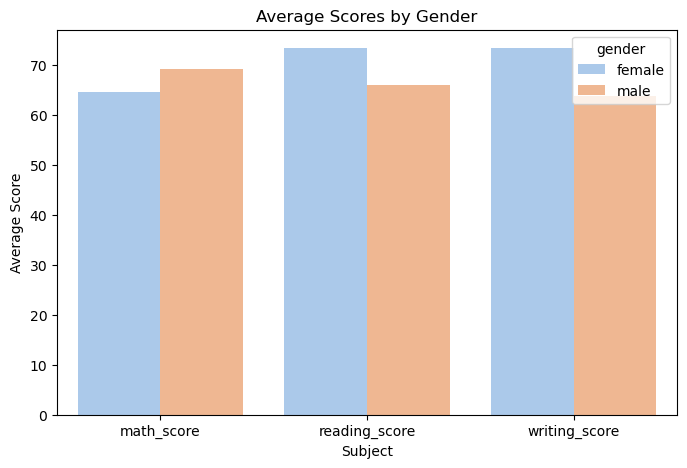

In [10]:
# 2. BAR PLOTS: MALE VS FEMALE PERFORMANCE

# Melt data for plotting
avg_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
melted = avg_scores.melt(id_vars='gender', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='Subject', y='Average Score', hue='gender', palette='pastel')
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.show()


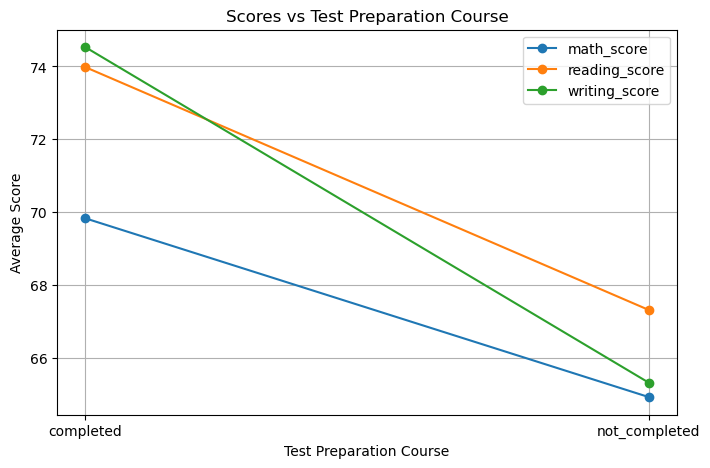

In [11]:
#3. LINE CHART: GRADES VS TEST PREPARATION COURSE

prep_scores = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

plt.figure(figsize=(8, 5))
for subject in ['math_score', 'reading_score', 'writing_score']:
    plt.plot(prep_scores['test_preparation_course'], prep_scores[subject], marker='o', label=subject)

plt.title('Scores vs Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

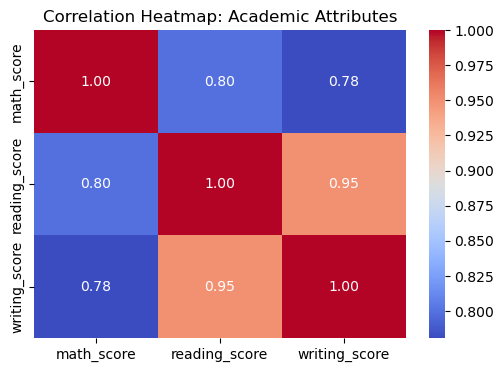

In [12]:
#4. HEATMAP OF CORRELATIONS

# Only numerical columns
score_columns = ['math_score', 'reading_score', 'writing_score']
correlation = df[score_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Academic Attributes')
plt.show()

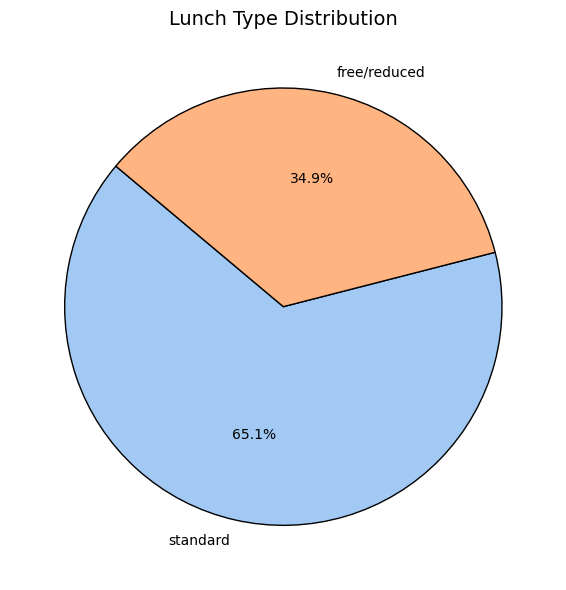

In [13]:
# Lunch distribution
lunch_counts = df['lunch'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Lunch Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()
